In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto': ['.ipynb_checkpoints', 'ABOD anomaly detection.pdf', 'actual vs predicted.pdf', 'all classes anomalies.pdf', 'anamaly.pdf', 'anamoalies of the class.pdf', 'Anomaly detection.ipynb', 'best_X_test_con_nome1.txt', 'best_X_test_ts.pkl', 'best_X_test_w6.csv', 'best_X_train_con_nomi.csv', 'best_X_train_ts.pkl', 'best_X_train_w6.csv', 'best_y_test_ts.pkl', 'best_y_train_ts.pkl', 'confu 2 classi.pdf', 'confusion matrix 23 w6.pdf', 'confusion matrix 540 w6.pdf', 'DBSCAN anomaly detection1.pdf', 'df_ts.pkl', 'df_ts_test.pkl', 'Dimensionality Reduction.ipynb', 'dtc_multiclass_roc 23 features.pdf', 'EDA.ipynb', 'EX Iso anomaly detection.pdf', 'Explainability.ipynb', 'Iso anomaly detection.pdf', 'KNN anomaly detection.pdf', 'lime 2.jpg', 'lime.jpg', 'Linear Regression .ipynb', 'linear regression lineare.pdf', 'linear regression parabolica.pdf', 'LOF anomaly detection.pdf', 'motifs gyro

In [2]:
X_trainbest = pd.read_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\best_X_train_con_nomi.csv")
X_testbest = pd.read_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\best_X_test_con_nome1.txt")
y_train = pd.read_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\y_train_wo_outliers_num2.txt", header= None)
y_test= pd.read_csv(r"C:\Users\Utente\Desktop\Università\Pisa\Secondo semestre - Secondo anno\Data Mining 2\progetto\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt", header= None)

In [3]:
X_trainbest

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,tBodyGyro-min()-X,"tBodyGyro-correlation()-Y,Z",tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)"
0,0.376314,0.963396,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.970905,-0.591773,-0.712372,...,0.847308,0.301099,-0.173179,-0.999963,-0.999981,-1.000000,-1.000000,-0.956134,-0.998285,0.179941
1,-0.013429,0.966561,-0.161343,0.122586,0.984520,-0.114893,0.102764,-0.970583,-0.417567,-0.105568,...,0.833721,0.169395,0.081569,-0.999996,-0.999974,-1.000000,-1.000000,-0.975866,-0.999472,0.180289
2,-0.124698,0.966878,-0.163711,0.094566,0.986770,-0.114893,0.102764,-0.970368,-0.056728,-0.254490,...,0.833721,-0.350646,0.038049,-0.999989,-0.999909,-1.000000,-1.000000,-0.989015,-0.999807,0.180637
3,-0.305693,0.967615,-0.163711,0.093425,0.986821,-0.121336,0.095753,-0.969400,-0.085823,-0.206281,...,0.834164,-0.725301,-0.092856,-0.999989,-0.999927,-1.000000,-0.793103,-0.986742,-0.999770,0.181935
4,-0.155804,0.968224,-0.166786,0.091682,0.987434,-0.121834,0.094059,-0.967051,-0.280665,-0.066327,...,0.839091,-0.724558,0.180441,-0.999994,-0.999975,-1.000000,-1.000000,-0.990063,-0.999873,0.185151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,-0.211822,0.923148,-0.214233,-0.016391,0.920554,-0.234998,-0.071977,-0.918375,-0.697090,-0.700438,...,0.347141,0.337338,-0.617906,-0.684177,-0.724214,-1.000000,-0.793103,-0.232600,-0.584282,0.238604
7270,-0.198555,0.918343,-0.231477,-0.016391,0.920554,-0.234998,-0.068919,-0.902880,-0.694761,-0.667777,...,0.518533,0.406319,-0.468825,-0.726986,-0.767363,-0.933333,-0.931034,-0.275373,-0.632536,0.252676
7271,-0.226826,0.919810,-0.249134,0.024684,0.933008,-0.216004,-0.068919,-0.907561,-0.677800,-0.471838,...,0.342910,0.483839,-0.492911,-0.655263,-0.757269,-0.933333,-0.931034,-0.220288,-0.641170,0.249145
7272,-0.257775,0.922323,-0.244267,0.024684,0.933008,-0.210542,-0.040009,-0.910648,-0.702518,-0.427343,...,0.342910,0.376823,-0.526184,-0.643425,-0.780800,-0.933333,-0.793103,-0.234539,-0.663579,0.246432


In [4]:
X_trainbest['Activity']= y_train
indexNames = X_trainbest[X_trainbest['Activity'] == 6 ].index
X_train_w6= X_trainbest.drop(indexNames)
X_train_w6

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,"tBodyGyro-correlation()-Y,Z",tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)",Activity
0,0.376314,0.963396,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.970905,-0.591773,-0.712372,...,0.301099,-0.173179,-0.999963,-0.999981,-1.000000,-1.000000,-0.956134,-0.998285,0.179941,5
1,-0.013429,0.966561,-0.161343,0.122586,0.984520,-0.114893,0.102764,-0.970583,-0.417567,-0.105568,...,0.169395,0.081569,-0.999996,-0.999974,-1.000000,-1.000000,-0.975866,-0.999472,0.180289,5
2,-0.124698,0.966878,-0.163711,0.094566,0.986770,-0.114893,0.102764,-0.970368,-0.056728,-0.254490,...,-0.350646,0.038049,-0.999989,-0.999909,-1.000000,-1.000000,-0.989015,-0.999807,0.180637,5
3,-0.305693,0.967615,-0.163711,0.093425,0.986821,-0.121336,0.095753,-0.969400,-0.085823,-0.206281,...,-0.725301,-0.092856,-0.999989,-0.999927,-1.000000,-0.793103,-0.986742,-0.999770,0.181935,5
4,-0.155804,0.968224,-0.166786,0.091682,0.987434,-0.121834,0.094059,-0.967051,-0.280665,-0.066327,...,-0.724558,0.180441,-0.999994,-0.999975,-1.000000,-1.000000,-0.990063,-0.999873,0.185151,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,-0.211822,0.923148,-0.214233,-0.016391,0.920554,-0.234998,-0.071977,-0.918375,-0.697090,-0.700438,...,0.337338,-0.617906,-0.684177,-0.724214,-1.000000,-0.793103,-0.232600,-0.584282,0.238604,2
7270,-0.198555,0.918343,-0.231477,-0.016391,0.920554,-0.234998,-0.068919,-0.902880,-0.694761,-0.667777,...,0.406319,-0.468825,-0.726986,-0.767363,-0.933333,-0.931034,-0.275373,-0.632536,0.252676,2
7271,-0.226826,0.919810,-0.249134,0.024684,0.933008,-0.216004,-0.068919,-0.907561,-0.677800,-0.471838,...,0.483839,-0.492911,-0.655263,-0.757269,-0.933333,-0.931034,-0.220288,-0.641170,0.249145,2
7272,-0.257775,0.922323,-0.244267,0.024684,0.933008,-0.210542,-0.040009,-0.910648,-0.702518,-0.427343,...,0.376823,-0.526184,-0.643425,-0.780800,-0.933333,-0.793103,-0.234539,-0.663579,0.246432,2


In [5]:
#X_train.reset_index(inplace=True)
X_train_w6.drop(columns= 'Activity', inplace=True)
X_trainbest.drop(columns= 'Activity', inplace=True)

In [6]:
X_train_w6.to_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\best_X_train_w6.csv")

In [7]:
indi= y_train[y_train[0] == 6 ].index
y_train_w6 = y_train.drop(index=indi)

In [8]:
y_train_w6.to_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\y_train_w6.csv")

In [9]:
X_testbest['Activity']= y_test
index= X_testbest[X_testbest['Activity'] == 6 ].index
X_test_w6= X_testbest.drop(index)
X_test_w6.drop(columns= 'Activity', inplace=True)
X_testbest.drop(columns= 'Activity', inplace=True)

In [10]:
X_test_w6.to_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\best_X_test_w6.csv")

In [11]:
indyx = y_test[y_test[0] == 6 ].index
y_test_w6= y_test.drop(index=indyx)
y_test

,0
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [12]:
y_test_w6.to_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\y_test_w6.csv")

### I build the naive bayes classifier on the dataset with 23 features

* GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

In [13]:
# utility function
def make_confusion_matrix( cfm, title):
    #group_names = ['TN','FP','FN','TP']

    group_counts = ["{0:0.0f}".format(value) for value in
                cfm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cfm.flatten()/np.sum(cf_matrix)]

    labels = [f"{v2}\n{v3}" for  v2, v3 in
          zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(6,6)
    plt.title(title)
    
    sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues',xticklabels=True, yticklabels=True)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted',fontsize=12)
    

Lancio il modello sul dataset con la classe 6

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# training the model on training set
gnb = GaussianNB()

# making predictions on the testing set
naiveb_model = gnb.fit(X_trainbest, y_train)
y_pred= naiveb_model.predict(X_testbest)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.83      0.96      0.89       496
           2       0.85      0.82      0.83       471
           3       0.90      0.81      0.86       420
           4       0.91      0.58      0.70       491
           5       0.71      0.93      0.80       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.87      0.85      0.85      2947
weighted avg       0.87      0.85      0.85      2947



In [16]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 85.2731591448931


Text(0.5, 1.0, 'Naive Bayer Classifier: Gaussian')

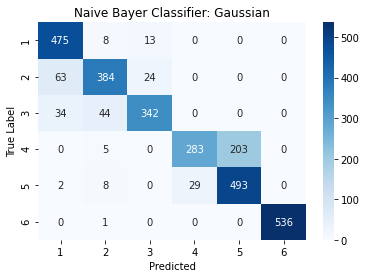

In [17]:
from sklearn.metrics import confusion_matrix
labels = [1,2,3,4,5,6]
cfm = confusion_matrix(y_test, y_pred, labels=labels)
cf= pd.DataFrame(cfm, index=labels, columns=labels)

sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Naive Bayer Classifier: Gaussian')

In [18]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, accuracy_score


def plot_multiclass_roc(clf, X, y, clf_name, ax = None):
    if not isinstance(y, type(np.array([]))):
        y = y.values
    if ax is None:
        fig = plt.figure(figsize = (6, 4))
        ax = fig.add_subplot()
    y_pred_proba = clf.predict_proba(X)   
    for i, label in enumerate(np.unique(y)):
        class_i_arr = (y == label).astype(int)
        class_i_prob_arr = y_pred_proba[:, i]
        RocCurveDisplay.from_predictions(class_i_arr, class_i_prob_arr,
                        name = clf_name + f' of class {label}', ax = ax)
    random = ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'k--', 
                 label = 'Random Classifier')
    ax.set_ylabel('True Positive Rate', fontsize = 14)
    ax.set_xlabel('False Positive Rate', fontsize = 14)


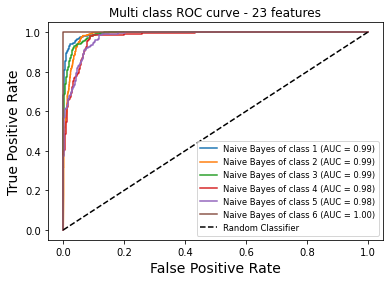

In [19]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(gnb, X_testbest, y_test, 
                    'Naive Bayes', ax = ax)
ax.legend(fontsize = 'small')
plt.title('Multi class ROC curve - 23 features')
plt.savefig('dtc_multiclass_roc 23 features.pdf', bbox_inches = 'tight')
plt.show()


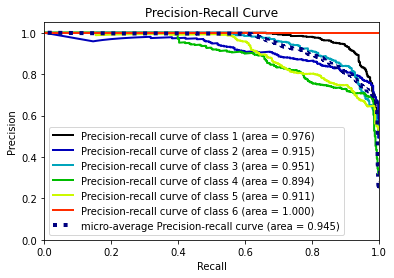

In [20]:
import scikitplot as skplt
y_probas = gnb.predict_proba(X_testbest)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()


Lancio il modello sul dataset senza la classe 6

In [21]:
# training the model on training set
gnbw6 = GaussianNB()

# making predictions on the testing set
naiveb_model_w6 = gnbw6.fit(X_train_w6, y_train_w6)
y_pred_w6= naiveb_model_w6.predict(X_test_w6)

In [22]:
print(classification_report(y_test_w6,y_pred_w6))

              precision    recall  f1-score   support

           1       0.83      0.96      0.89       496
           2       0.86      0.82      0.83       471
           3       0.90      0.81      0.86       420
           4       0.91      0.58      0.70       491
           5       0.71      0.93      0.80       532

    accuracy                           0.82      2410
   macro avg       0.84      0.82      0.82      2410
weighted avg       0.84      0.82      0.82      2410



In [23]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test_w6, y_pred_w6)*100)

Gaussian Naive Bayes model accuracy(in %): 82.03319502074689


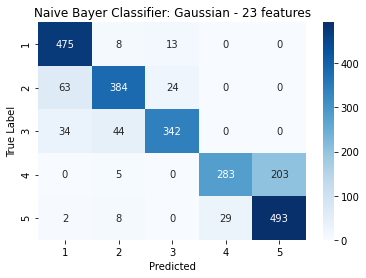

In [24]:
from sklearn.metrics import confusion_matrix
labels = [1,2,3,4,5]
cfmw6 = confusion_matrix(y_test_w6, y_pred_w6, labels=labels)
cfw6= pd.DataFrame(cfmw6, index=labels, columns=labels)

sns.heatmap(cfw6, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Naive Bayer Classifier: Gaussian - 23 features')
plt.savefig('confusion matrix 23 w6.pdf', bbox_inches='tight')

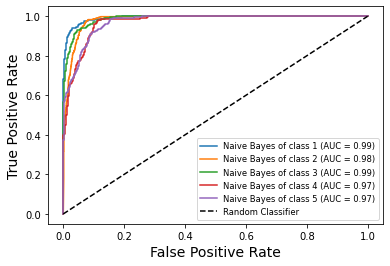

In [25]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(gnbw6, X_test_w6, y_test_w6, 
                    'Naive Bayes', ax = ax)
ax.legend(fontsize = 'small')
#plt.savefig('dtc_multiclass_roc.pdf', bbox_inches = 'tight')
plt.show()

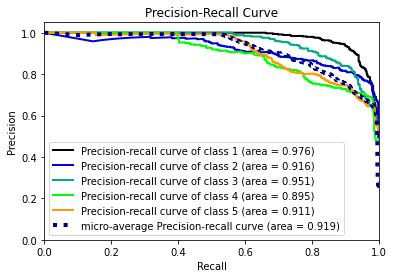

<Figure size 432x288 with 0 Axes>

In [26]:
y_probas_w6 = gnbw6.predict_proba(X_test_w6)
skplt.metrics.plot_precision_recall(y_test_w6, y_probas_w6)
plt.show()
plt.savefig('precisi recall w6 23 features.pdf', bbox_inches = 'tight')

### I build the naive bayes classifier on the dataset with all the features

In [27]:
X_train540 = pd.read_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\X_train_wo_outliers_540attr_w_nomi.csv")
X_test540 = pd.read_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\X_test_540attr_w_nomi.csv")
y_train540 = pd.read_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\y_train_wo_outliers_num2.txt", header= None)
y_test540 = pd.read_csv(r"C:\Users\Utente\Desktop\Università\Pisa\Secondo semestre - Secondo anno\Data Mining 2\progetto\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt", header= None)

In [28]:
gnb540 = GaussianNB()

# making predictions on the testing set
naiveb_model540 = gnb540.fit(X_train540, y_train540)
y_pred540= naiveb_model540.predict(X_test540)

In [29]:
print(classification_report(y_test540,y_pred540))

              precision    recall  f1-score   support

           1       0.85      0.82      0.83       496
           2       0.75      0.96      0.84       471
           3       0.83      0.67      0.74       420
           4       0.70      0.86      0.78       491
           5       0.85      0.63      0.72       532
           6       1.00      0.98      0.99       537

    accuracy                           0.82      2947
   macro avg       0.83      0.82      0.82      2947
weighted avg       0.83      0.82      0.82      2947



In [30]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test540, y_pred540)*100)

Gaussian Naive Bayes model accuracy(in %): 82.21920597217509


Text(0.5, 1.0, 'Naive Bayer Classifier: Gaussian')

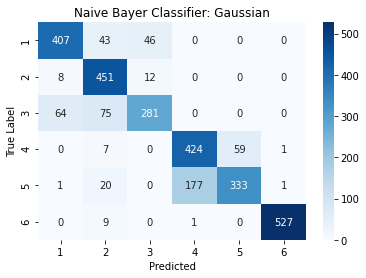

In [31]:
labels = [1,2,3,4,5,6]
cfm540 = confusion_matrix(y_test540, y_pred540, labels=labels)
cfw540= pd.DataFrame(cfm540, index=labels, columns=labels)

sns.heatmap(cfw540, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Naive Bayer Classifier: Gaussian')

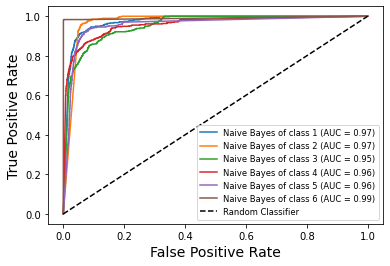

In [32]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(gnb540, X_test540, y_test540, 
                    'Naive Bayes', ax = ax)
ax.legend(fontsize = 'small')
#plt.savefig('dtc_multiclass_roc.pdf', bbox_inches = 'tight')
plt.show()

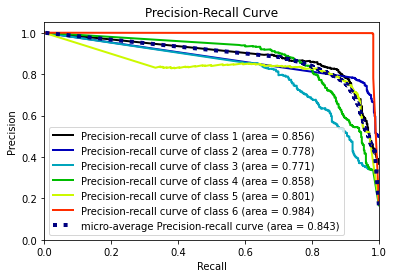

In [33]:
y_probas540 = gnb540.predict_proba(X_test540)
skplt.metrics.plot_precision_recall(y_test540, y_probas540)
plt.show()

Costruisco il modello con il dataset con tutte le faetures ma senza la classe 6

In [34]:
X_train540['Activity']= y_train540
indexNames540 = X_train540[X_train540['Activity'] == 6 ].index
X_train_w6_540= X_train540.drop(indexNames540)

In [35]:
X_train_w6_540.drop(columns= 'Activity', inplace=True)
X_train540.drop(columns= 'Activity', inplace=True)

In [36]:
X_train_w6_540.to_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\X_train_wo_outliers_540attr_w6.csv")

In [37]:
indice= y_train540[y_train540[0] == 6 ].index
y_train_w6_540 = y_train540.drop(index=indice)

In [38]:
y_train_w6_540.to_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\y_train_wo_540attr_w6.csv")

In [39]:
X_test540['Activity']= y_test540
index= X_test540[X_test540['Activity'] == 6 ].index
X_test_w6_540= X_test540.drop(index)
X_test_w6_540.drop(columns= 'Activity', inplace=True)
X_test540.drop(columns= 'Activity', inplace=True)

In [40]:
X_test_w6_540.to_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\X_test_wo_outliers_540attr_w6.csv")

In [41]:
indyxi = y_test540[y_test540[0] == 6 ].index
y_test_w6_540= y_test540.drop(index=indyxi)

In [42]:
y_test_w6_540.to_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\y_test_w6_540.csv")

In [43]:
gnb540_w6 = GaussianNB()

# making predictions on the testing set
naiveb_model540_w6 = gnb540_w6.fit(X_train_w6_540, y_train_w6_540)
y_pred540_w6 = naiveb_model540_w6.predict(X_test_w6_540)

In [44]:
print(classification_report(y_test_w6_540,y_pred540_w6))

              precision    recall  f1-score   support

           1       0.85      0.82      0.83       496
           2       0.76      0.96      0.85       471
           3       0.83      0.67      0.74       420
           4       0.71      0.86      0.78       491
           5       0.85      0.63      0.72       532

    accuracy                           0.79      2410
   macro avg       0.80      0.79      0.78      2410
weighted avg       0.80      0.79      0.78      2410



In [45]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test540, y_pred540)*100)

Gaussian Naive Bayes model accuracy(in %): 82.21920597217509


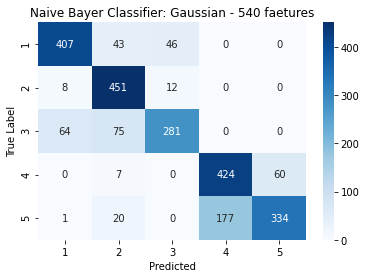

In [46]:
labels = [1,2,3,4,5]
cfm540_w6 = confusion_matrix(y_test_w6_540, y_pred540_w6, labels=labels)
cfw540_w6= pd.DataFrame(cfm540_w6, index=labels, columns=labels)

sns.heatmap(cfw540_w6, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Naive Bayer Classifier: Gaussian - 540 faetures')
plt.savefig('confusion matrix 540 w6.pdf', bbox_inches='tight')

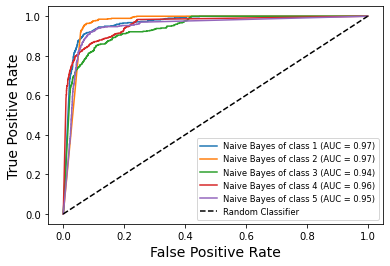

In [47]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(gnb540_w6, X_test_w6_540, y_test_w6_540, 
                    'Naive Bayes', ax = ax)
ax.legend(fontsize = 'small')
#plt.savefig('dtc_multiclass_roc.pdf', bbox_inches = 'tight')
plt.show()

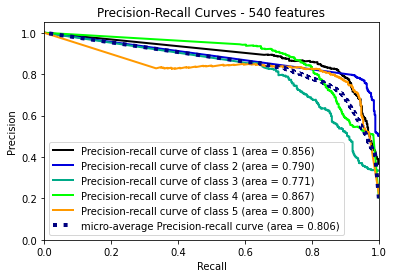

In [48]:
y_probas540_w6 = gnb540_w6.predict_proba(X_test_w6_540)
skplt.metrics.plot_precision_recall(y_test_w6_540, y_probas540_w6)

plt.title("Precision-Recall Curves - 540 features")
plt.savefig('precision recall 540 w6.pdf', bbox_inches = 'tight')
plt.show()

### Costruisco il Naive Bayes classifier considerando due classi "stationary" and "dynamic"

In [49]:
X_trainbest['Activity']= y_train
X_trainbest

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,"tBodyGyro-correlation()-Y,Z",tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)",Activity
0,0.376314,0.963396,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.970905,-0.591773,-0.712372,...,0.301099,-0.173179,-0.999963,-0.999981,-1.000000,-1.000000,-0.956134,-0.998285,0.179941,5
1,-0.013429,0.966561,-0.161343,0.122586,0.984520,-0.114893,0.102764,-0.970583,-0.417567,-0.105568,...,0.169395,0.081569,-0.999996,-0.999974,-1.000000,-1.000000,-0.975866,-0.999472,0.180289,5
2,-0.124698,0.966878,-0.163711,0.094566,0.986770,-0.114893,0.102764,-0.970368,-0.056728,-0.254490,...,-0.350646,0.038049,-0.999989,-0.999909,-1.000000,-1.000000,-0.989015,-0.999807,0.180637,5
3,-0.305693,0.967615,-0.163711,0.093425,0.986821,-0.121336,0.095753,-0.969400,-0.085823,-0.206281,...,-0.725301,-0.092856,-0.999989,-0.999927,-1.000000,-0.793103,-0.986742,-0.999770,0.181935,5
4,-0.155804,0.968224,-0.166786,0.091682,0.987434,-0.121834,0.094059,-0.967051,-0.280665,-0.066327,...,-0.724558,0.180441,-0.999994,-0.999975,-1.000000,-1.000000,-0.990063,-0.999873,0.185151,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,-0.211822,0.923148,-0.214233,-0.016391,0.920554,-0.234998,-0.071977,-0.918375,-0.697090,-0.700438,...,0.337338,-0.617906,-0.684177,-0.724214,-1.000000,-0.793103,-0.232600,-0.584282,0.238604,2
7270,-0.198555,0.918343,-0.231477,-0.016391,0.920554,-0.234998,-0.068919,-0.902880,-0.694761,-0.667777,...,0.406319,-0.468825,-0.726986,-0.767363,-0.933333,-0.931034,-0.275373,-0.632536,0.252676,2
7271,-0.226826,0.919810,-0.249134,0.024684,0.933008,-0.216004,-0.068919,-0.907561,-0.677800,-0.471838,...,0.483839,-0.492911,-0.655263,-0.757269,-0.933333,-0.931034,-0.220288,-0.641170,0.249145,2
7272,-0.257775,0.922323,-0.244267,0.024684,0.933008,-0.210542,-0.040009,-0.910648,-0.702518,-0.427343,...,0.376823,-0.526184,-0.643425,-0.780800,-0.933333,-0.793103,-0.234539,-0.663579,0.246432,2


In [50]:
# 1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'

X_trainbest['newActivity']= None

for index in range(X_trainbest.shape[0]):
    if X_trainbest['Activity'].iloc[index] == 1 or X_trainbest['Activity'].iloc[index] == 2 or X_trainbest['Activity'].iloc[index] == 3:
        X_trainbest['newActivity'].iloc[index] = 'Dynamic'
    else:
        X_trainbest['newActivity'].iloc[index] = 'Stationary'
    
    
X_trainbest

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)",Activity,newActivity
0,0.376314,0.963396,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.970905,-0.591773,-0.712372,...,-0.173179,-0.999963,-0.999981,-1.000000,-1.000000,-0.956134,-0.998285,0.179941,5,Stationary
1,-0.013429,0.966561,-0.161343,0.122586,0.984520,-0.114893,0.102764,-0.970583,-0.417567,-0.105568,...,0.081569,-0.999996,-0.999974,-1.000000,-1.000000,-0.975866,-0.999472,0.180289,5,Stationary
2,-0.124698,0.966878,-0.163711,0.094566,0.986770,-0.114893,0.102764,-0.970368,-0.056728,-0.254490,...,0.038049,-0.999989,-0.999909,-1.000000,-1.000000,-0.989015,-0.999807,0.180637,5,Stationary
3,-0.305693,0.967615,-0.163711,0.093425,0.986821,-0.121336,0.095753,-0.969400,-0.085823,-0.206281,...,-0.092856,-0.999989,-0.999927,-1.000000,-0.793103,-0.986742,-0.999770,0.181935,5,Stationary
4,-0.155804,0.968224,-0.166786,0.091682,0.987434,-0.121834,0.094059,-0.967051,-0.280665,-0.066327,...,0.180441,-0.999994,-0.999975,-1.000000,-1.000000,-0.990063,-0.999873,0.185151,5,Stationary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,-0.211822,0.923148,-0.214233,-0.016391,0.920554,-0.234998,-0.071977,-0.918375,-0.697090,-0.700438,...,-0.617906,-0.684177,-0.724214,-1.000000,-0.793103,-0.232600,-0.584282,0.238604,2,Dynamic
7270,-0.198555,0.918343,-0.231477,-0.016391,0.920554,-0.234998,-0.068919,-0.902880,-0.694761,-0.667777,...,-0.468825,-0.726986,-0.767363,-0.933333,-0.931034,-0.275373,-0.632536,0.252676,2,Dynamic
7271,-0.226826,0.919810,-0.249134,0.024684,0.933008,-0.216004,-0.068919,-0.907561,-0.677800,-0.471838,...,-0.492911,-0.655263,-0.757269,-0.933333,-0.931034,-0.220288,-0.641170,0.249145,2,Dynamic
7272,-0.257775,0.922323,-0.244267,0.024684,0.933008,-0.210542,-0.040009,-0.910648,-0.702518,-0.427343,...,-0.526184,-0.643425,-0.780800,-0.933333,-0.793103,-0.234539,-0.663579,0.246432,2,Dynamic


In [51]:
X_testbest['Activity']= y_test
X_testbest

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,"tBodyGyro-correlation()-Y,Z",tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)",Activity
0,0.076989,0.936489,-0.279244,0.152895,0.944461,-0.262160,-0.076162,-0.864621,-0.431839,-0.780391,...,-0.301735,0.053780,-0.998506,-0.996894,-1.000000,-0.931034,-0.711074,-0.953984,0.276801,5
1,-0.104983,0.927404,-0.304870,0.152895,0.944461,-0.262160,0.149013,-0.858163,-0.540245,-0.737390,...,-0.533962,0.458489,-0.999850,-0.999197,-1.000000,-0.931034,-0.959746,-0.998476,0.281343,5
2,0.305653,0.929915,-0.304870,0.139454,0.948704,-0.261661,0.144969,-0.859947,-0.315239,-0.155203,...,-0.730050,0.141732,-0.999976,-0.999932,-1.000000,-1.000000,-0.983784,-0.999570,0.280083,5
3,-0.063792,0.928881,-0.305101,0.136124,0.947309,-0.272916,0.142107,-0.853713,-0.375191,-0.169368,...,-0.891736,0.131086,-0.999983,-0.999918,-1.000000,-1.000000,-0.982120,-0.999504,0.284114,5
4,0.235151,0.926600,-0.312552,0.133541,0.946221,-0.279190,0.130931,-0.843378,-0.596321,-0.465463,...,-0.918319,-0.075711,-0.999961,-0.999935,-1.000000,-0.931034,-0.978838,-0.999500,0.290722,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,-0.258908,0.890968,-0.278442,0.226640,0.903413,-0.272203,-0.243507,-0.870515,-0.560114,-0.716222,...,0.340033,-0.350785,-0.734651,-0.811454,-1.000000,-0.931034,-0.332141,-0.702110,0.274627,2
2943,-0.249325,0.891281,-0.278442,0.220590,0.903793,-0.268172,-0.243507,-0.872342,-0.583433,-0.538037,...,0.272670,-0.374953,-0.747251,-0.794895,-1.000000,-0.931034,-0.316954,-0.674032,0.273578,2
2944,-0.351080,0.890897,-0.273818,0.220590,0.903793,-0.268172,-0.245178,-0.871197,-0.598919,-0.559421,...,0.236729,-0.469371,-0.762837,-0.807419,-1.000000,-0.931034,-0.377240,-0.715711,0.274479,2
2945,-0.190791,0.892736,-0.272785,0.231517,0.909007,-0.244744,-0.245178,-0.884788,-0.466692,-0.670957,...,0.185292,-0.279848,-0.751525,-0.839262,-0.933333,-0.931034,-0.390201,-0.745225,0.264782,2


In [52]:
X_testbest['newActivity']= None

for index in range(X_testbest.shape[0]):
    if X_testbest['Activity'].iloc[index] == 1 or X_testbest['Activity'].iloc[index] == 2 or X_testbest['Activity'].iloc[index] == 3:
        X_testbest['newActivity'].iloc[index] = 'Dynamic'
    else:
        X_testbest['newActivity'].iloc[index] = 'Stationary'
        
X_testbest

,"tBodyAcc-correlation()-X,Y",tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-Y,3",...,tBodyAccMag-arCoeff()1,"fBodyAcc-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,24",fBodyGyro-maxInds-X,fBodyGyro-maxInds-Z,fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)",Activity,newActivity
0,0.076989,0.936489,-0.279244,0.152895,0.944461,-0.262160,-0.076162,-0.864621,-0.431839,-0.780391,...,0.053780,-0.998506,-0.996894,-1.000000,-0.931034,-0.711074,-0.953984,0.276801,5,Stationary
1,-0.104983,0.927404,-0.304870,0.152895,0.944461,-0.262160,0.149013,-0.858163,-0.540245,-0.737390,...,0.458489,-0.999850,-0.999197,-1.000000,-0.931034,-0.959746,-0.998476,0.281343,5,Stationary
2,0.305653,0.929915,-0.304870,0.139454,0.948704,-0.261661,0.144969,-0.859947,-0.315239,-0.155203,...,0.141732,-0.999976,-0.999932,-1.000000,-1.000000,-0.983784,-0.999570,0.280083,5,Stationary
3,-0.063792,0.928881,-0.305101,0.136124,0.947309,-0.272916,0.142107,-0.853713,-0.375191,-0.169368,...,0.131086,-0.999983,-0.999918,-1.000000,-1.000000,-0.982120,-0.999504,0.284114,5,Stationary
4,0.235151,0.926600,-0.312552,0.133541,0.946221,-0.279190,0.130931,-0.843378,-0.596321,-0.465463,...,-0.075711,-0.999961,-0.999935,-1.000000,-0.931034,-0.978838,-0.999500,0.290722,5,Stationary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,-0.258908,0.890968,-0.278442,0.226640,0.903413,-0.272203,-0.243507,-0.870515,-0.560114,-0.716222,...,-0.350785,-0.734651,-0.811454,-1.000000,-0.931034,-0.332141,-0.702110,0.274627,2,Dynamic
2943,-0.249325,0.891281,-0.278442,0.220590,0.903793,-0.268172,-0.243507,-0.872342,-0.583433,-0.538037,...,-0.374953,-0.747251,-0.794895,-1.000000,-0.931034,-0.316954,-0.674032,0.273578,2,Dynamic
2944,-0.351080,0.890897,-0.273818,0.220590,0.903793,-0.268172,-0.245178,-0.871197,-0.598919,-0.559421,...,-0.469371,-0.762837,-0.807419,-1.000000,-0.931034,-0.377240,-0.715711,0.274479,2,Dynamic
2945,-0.190791,0.892736,-0.272785,0.231517,0.909007,-0.244744,-0.245178,-0.884788,-0.466692,-0.670957,...,-0.279848,-0.751525,-0.839262,-0.933333,-0.931034,-0.390201,-0.745225,0.264782,2,Dynamic


In [53]:
X_trainbest.drop(columns= 'Activity', inplace=True)
y_trainbest= X_trainbest[['newActivity']]
X_trainbest.drop(columns= 'newActivity', inplace=True)

In [54]:
y_trainbest

,newActivity
0,Stationary
1,Stationary
2,Stationary
3,Stationary
4,Stationary
...,...
7269,Dynamic
7270,Dynamic
7271,Dynamic
7272,Dynamic


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_trainbest['newActivity'] = le.fit_transform(y_trainbest['newActivity'])
y_trainbest['newActivity'].value_counts()

1    4028
0    3246
Name: newActivity, dtype: int64

In [56]:
y_trainbest['newActivity']

0       1
1       1
2       1
3       1
4       1
       ..
7269    0
7270    0
7271    0
7272    0
7273    0
Name: newActivity, Length: 7274, dtype: int32

In [57]:
X_testbest.drop(columns= 'Activity', inplace=True)
y_testbest= X_testbest[['newActivity']]
X_testbest.drop(columns= 'newActivity', inplace=True)

In [58]:
y_testbest

,newActivity
0,Stationary
1,Stationary
2,Stationary
3,Stationary
4,Stationary
...,...
2942,Dynamic
2943,Dynamic
2944,Dynamic
2945,Dynamic


In [59]:
le = LabelEncoder()
y_testbest['newActivity'] = le.fit_transform(y_testbest['newActivity'])
y_testbest['newActivity'].value_counts()

1    1560
0    1387
Name: newActivity, dtype: int64

In [60]:
gnb2class = GaussianNB()

# making predictions on the testing set
model = gnb2class.fit(X_trainbest, y_trainbest)
y_pred2class= model.predict(X_testbest)

In [61]:
print(classification_report(y_testbest,y_pred2class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1387
           1       1.00      0.97      0.99      1560

    accuracy                           0.98      2947
   macro avg       0.98      0.99      0.98      2947
weighted avg       0.99      0.98      0.98      2947



In [62]:
# utility function
def make_confusion_matrix( cfm, title):
    group_names = ['TN','FP','FN','TP']

    group_counts = ["{0:0.0f}".format(value) for value in
                cfm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cfm.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    plt.title(title)
    
    sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted',fontsize=12)
    

def plot_roc_curve(y_test, prediction, name_model):
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, prediction)

    plt.grid()
    auc_score = round(auc(test_fpr, test_tpr),2)
    plt.plot(test_fpr, test_tpr, label=f"{name_model} - AUC ="+ str(auc_score))
    plt.plot([0,1],[0,1],'r--')
    plt.legend()
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.title(f" AUC(ROC curve) - {name_model}")
    plt.grid(color='black', linestyle='', linewidth=0.5)
    plt.show()

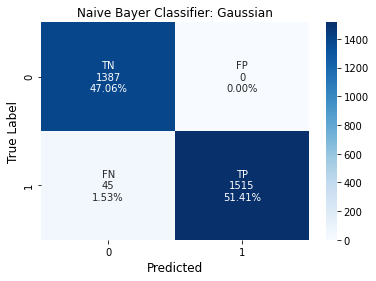

In [63]:
cf_matrix = confusion_matrix(y_testbest, y_pred2class)
make_confusion_matrix(cf_matrix, 'Naive Bayer Classifier: Gaussian')
plt.savefig('confu 2 classi.pdf', bbox_inches = 'tight')

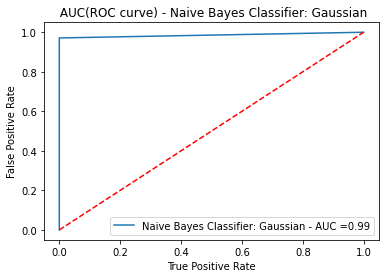

In [64]:
plot_roc_curve(y_testbest, y_pred2class, 'Naive Bayes Classifier: Gaussian')

In [65]:
def plot_lift(y_true:'np array', y_pred_proba:'np array', 
              label = None, baseline = False):
    n_samples = len(y_true)
    idx = np.argsort(y_pred_proba)[::-1]
    cum_trues = list(accumulate(y_true[idx]))
    perc_trues = map(lambda x: x / cum_trues[-1], cum_trues)   
    cum_samples = range(1, n_samples + 1)
    perc_samples = map(lambda x: x / n_samples, cum_samples)  
    lift = list(map(lambda x, y: x / y, perc_trues, perc_samples))    
    plt.plot(lift, label = label)
    if baseline:
        plt.axhline(y = 1, ls = '--', color = 'k')
    plt.xlabel('% of samples', fontsize = 14)
    plt.ylabel('Lift', fontsize = 14)

In [66]:
plt.figure(figsize = (6, 4))
for i, cls in enumerate(classifiers):
    pred = cls.predict_proba(X2_test.values)[:,1]
    plot_lift(y2_test.values, pred, labels[i], baseline = i == n-1)
pred = csdtc_custom.predict_proba(X2_test.values)[:,1]
plot_lift(y2_test.values, pred, 'Meta-Cost')
plt.legend(loc = 'lower right', fontsize = 'small', ncol = 2)
# plt.savefig('imb_lift_comparison.pdf', bbox_inches = 'tight')
plt.show()

NameError: name 'classifiers' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
predicted_probas = gnb2class.predict_proba(X_testbest)
skplt.metrics.plot_cumulative_gain(y_testbest, predicted_probas)
plt.show()